# Automobiles project

### Automobile dataset 

### Outlook 

In [10]:
cars=read.csv("Downloads/Automobile.csv") 
head(cars)
str(cars)

name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
chevrolet chevelle malibu,18,8,307,130,3504,12.0,70,usa
buick skylark 320,15,8,350,165,3693,11.5,70,usa
plymouth satellite,18,8,318,150,3436,11.0,70,usa
amc rebel sst,16,8,304,150,3433,12.0,70,usa
ford torino,17,8,302,140,3449,10.5,70,usa
ford galaxie 500,15,8,429,198,4341,10.0,70,usa


'data.frame':	398 obs. of  9 variables:
 $ name        : Factor w/ 305 levels "amc ambassador brougham",..: 50 37 232 15 162 142 55 224 242 2 ...
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model_year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : Factor w/ 3 levels "europe","japan",..: 3 3 3 3 3 3 3 3 3 3 ...


### Features

In [11]:
sapply(cars, class)

name          mpg    cylinders displacement   horsepower       weight 
    "factor"    "numeric"    "integer"    "numeric"    "integer"    "integer" 
acceleration   model_year       origin 
   "numeric"    "integer"     "factor"

### Data overview 

In [5]:
summary(cars)

             name          mpg          cylinders      displacement  
 ford pinto    :  6   Min.   : 9.00   Min.   :3.000   Min.   : 68.0  
 amc matador   :  5   1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.2  
 ford maverick :  5   Median :23.00   Median :4.000   Median :148.5  
 toyota corolla:  5   Mean   :23.51   Mean   :5.455   Mean   :193.4  
 amc gremlin   :  4   3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0  
 amc hornet    :  4   Max.   :46.60   Max.   :8.000   Max.   :455.0  
 (Other)       :369                                                  
   horsepower        weight      acceleration     model_year       origin   
 Min.   : 46.0   Min.   :1613   Min.   : 8.00   Min.   :70.00   europe: 70  
 1st Qu.: 75.0   1st Qu.:2224   1st Qu.:13.82   1st Qu.:73.00   japan : 79  
 Median : 93.5   Median :2804   Median :15.50   Median :76.00   usa   :249  
 Mean   :104.5   Mean   :2970   Mean   :15.57   Mean   :76.01               
 3rd Qu.:126.0   3rd Qu.:3608   3rd Qu.:17.18   3rd Qu.

### Missing values 

Another important aspect while performing a detailed analisys of dataset is handling the missing values. Those elements can impact the results of finding specific values like for example average value, but also can destroy plots. Let's find out how many missing values (if any) have our dataset.

In [6]:
sum(is.na(cars))

[1] 6

Fortunately there are only 6 missing values. Bearing in mind that our dataset has 398 samples we will simply delete the samples that have missing values, as it will not significantly decrese the number of parameters.

In [2]:
dropnull_cars=cars[rowSums(is.na(cars))<=0,]

### Data analysis 

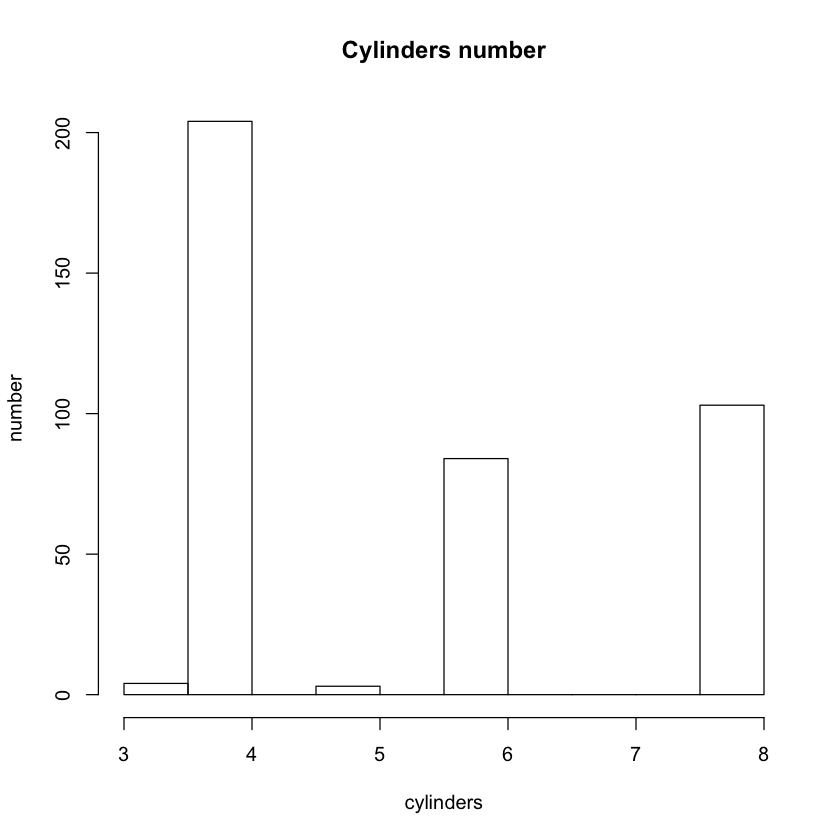

In [15]:
hist(cars$cylinders, 
	xlab="cylinders", 
	ylab="number", main = "Cylinders number")

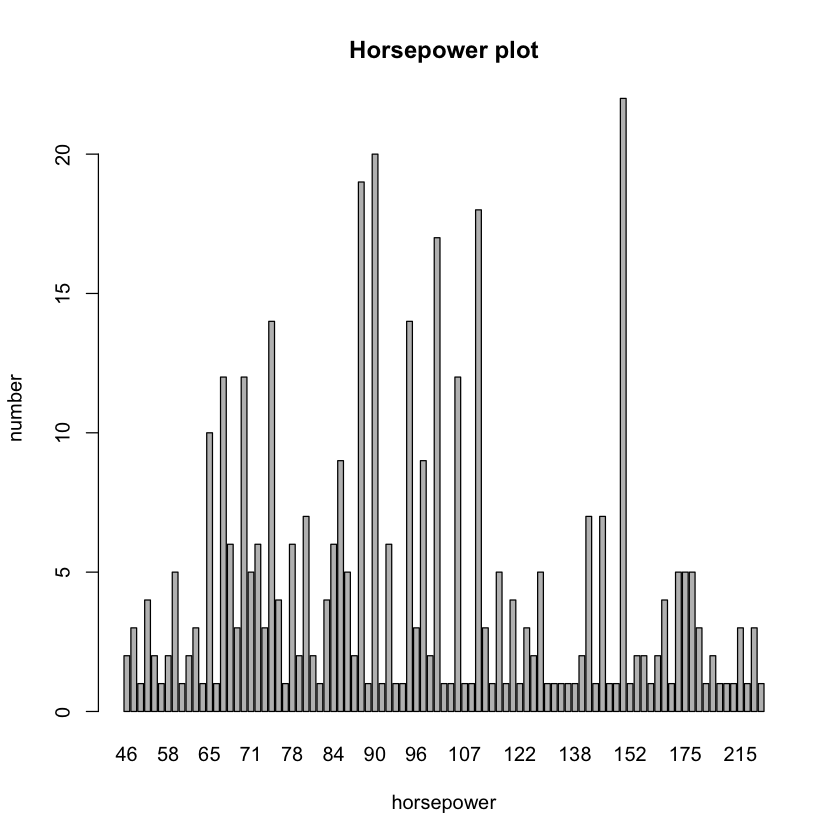

In [14]:
barplot(table(cars$horsepower), 
        xlab="horsepower", 
        ylab="number", main = "Horsepower plot")

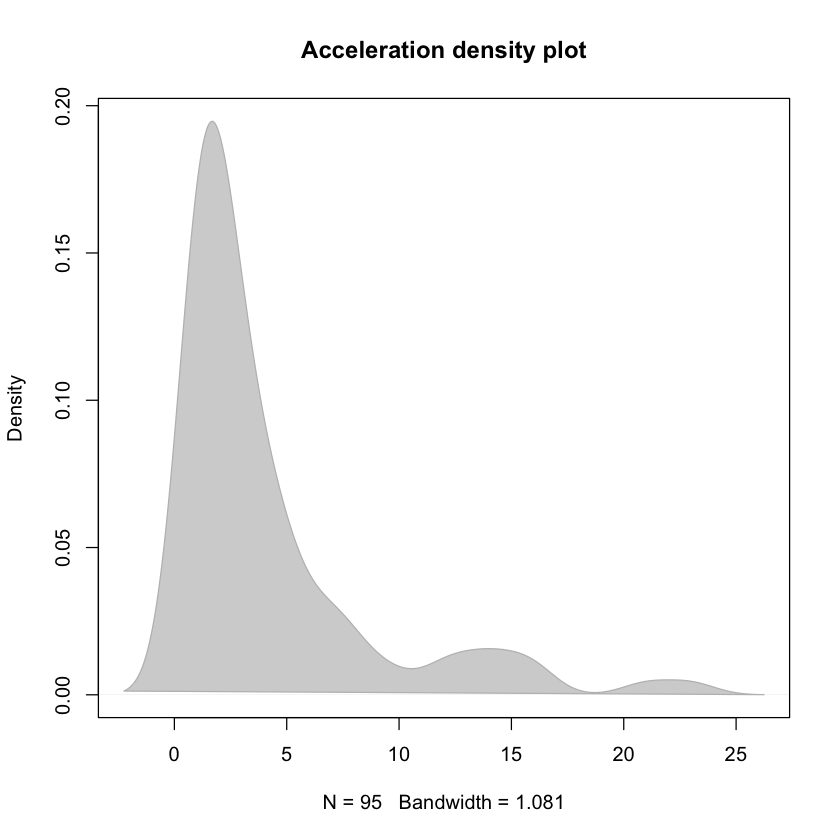

In [16]:
temp<-density(table(cars$acceleration)) 
plot(temp, type="n", 
     main="Acceleration density plot") 
polygon(temp, col="lightgray", 
        border="gray")

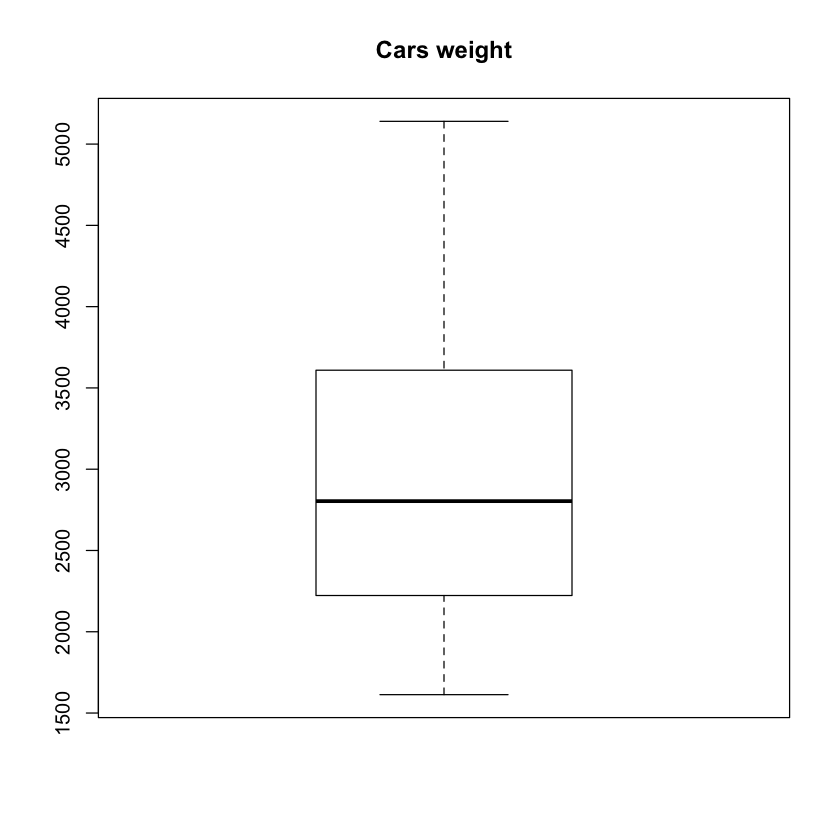

In [13]:
boxplot(cars$weight, main="Cars weight")

Our dataset have the name that is unique for most of the samples. Such kind of data isn't very helpful as there is no point in analizing every value separately. However, every name starts with the brand of the car - this will definitely help us to generate some truths about the samples. Using the funcion of R language we will pull out the interesting names and create new brand column.

In [25]:
cars$brand <- sapply(strsplit(as.character(cars$name), " "), function(x) x[1])
table(cars$brand)


          amc          audi           bmw         buick      cadillac 
           28             7             2            17             2 
        capri     chevroelt     chevrolet         chevy      chrysler 
            1             1            43             3             6 
       datsun         dodge          fiat          ford            hi 
           23            28             8            51             1 
        honda         maxda         mazda      mercedes mercedes-benz 
           13             2            10             1             2 
      mercury        nissan    oldsmobile          opel       peugeot 
           11             1            10             4             8 
     plymouth       pontiac       renault          saab        subaru 
           31            16             5             4             4 
       toyota       toyouta       triumph     vokswagen    volkswagen 
           25             1             1             1            15 
     

Another thing we need to notice is that some names had spelling mistake like "toyouta" instead of "toyota" and were wrongly interpretet as another brand. We need to fix that.

In [42]:

cars$brand <- gsub("toyouta", "toyota", cars$brand)
cars$brand <- gsub("vokswagen", "volkswagen", cars$brand)
cars$brand <- gsub("vw", "volkswagen", cars$brand)
cars$brand <- gsub("chevroelt", "chevrolet", cars$brand)
cars$brand <- gsub("chevy", "chevrolet", cars$brand)
cars$brand <- gsub("maxda", "mazda", cars$brand)
cars$brand <- gsub("mercedes-benz", "mercedes", cars$brand)

table(cars$brand)


       amc       audi        bmw      buick   cadillac      capri  chevrolet 
        28          7          2         17          2          1         47 
  chrysler     datsun      dodge       fiat       ford         hi      honda 
         6         23         28          8         51          1         13 
     mazda   mercedes    mercury     nissan oldsmobile       opel    peugeot 
        12          3         11          1         10          4          8 
  plymouth    pontiac    renault       saab     subaru     toyota    triumph 
        31         16          5          4          4         26          1 
volkswagen      volvo 
        22          6 

In [40]:
library(knitr)
library(dplyr)

grouped_data <- cars %>% group_by(brand)

agg_func <- list(
  avg_mpg = ~mean(mpg),
  max_mpg = ~max(mpg),
  min_mpg = ~min(mpg),
  origin = ~first(origin)
)

data <- grouped_data %>% summarize(
  avg_mpg = mean(mpg),
  max_mpg = max(mpg),
  min_mpg = min(mpg),
  origin = first(origin)
)

data <- data %>%
  arrange(desc(avg_mpg))

kable(data)



|brand      |  avg_mpg| max_mpg| min_mpg|origin |
|:----------|--------:|-------:|-------:|:------|
|nissan     | 36.00000|    36.0|    36.0|japan  |
|triumph    | 35.00000|    35.0|    35.0|europe |
|honda      | 33.76154|    44.6|    24.0|japan  |
|renault    | 32.88000|    40.9|    26.0|europe |
|volkswagen | 31.84091|    44.3|    22.0|europe |
|datsun     | 31.11304|    40.8|    22.0|japan  |
|subaru     | 30.52500|    33.8|    26.0|japan  |
|mazda      | 30.05833|    46.6|    18.0|japan  |
|fiat       | 28.91250|    37.3|    24.0|europe |
|toyota     | 28.16538|    39.1|    19.0|japan  |
|audi       | 26.71429|    36.4|    20.0|europe |
|opel       | 25.75000|    28.0|    24.0|europe |
|capri      | 25.00000|    25.0|    25.0|usa    |
|mercedes   | 23.96667|    30.0|    16.5|europe |
|saab       | 23.90000|    25.0|    21.6|europe |
|bmw        | 23.75000|    26.0|    21.5|europe |
|peugeot    | 23.68750|    30.0|    16.2|europe |
|dodge      | 22.06071|    36.0|    11.0|usa    

Above we prepared the table that sums up the fuel efficiency measured in miles per gallon for each brand. Cars like nissan, triumph or honda had very high values - they used so much fuel that the owners must have regret the buing. Suprisingly cars like bmw, mercedes or dodge were classified in the middle and comparing to theighest values their performace is pretty good. It was definitely the best to have car like ford,amc or mercury.

In [41]:
library(knitr)
library(dplyr)

grouped_data <- cars %>% group_by(brand)

agg_func <- list(
  avg_acceleration = ~mean(acceleration),
  max_acceleration = ~max(acceleration),
  min_acceleration = ~min(acceleration),
  origin = ~first(origin)
)

data <- grouped_data %>% summarize(
  avg_acceleration = mean(acceleration),
  max_acceleration = max(acceleration),
  min_acceleration = min(acceleration),
  origin = first(origin)
)

data <- data %>%
  arrange(desc(avg_acceleration))

kable(data)



|brand      | avg_acceleration| max_acceleration| min_acceleration|origin |
|:----------|----------------:|----------------:|----------------:|:------|
|peugeot    |         19.55000|             24.8|             15.8|europe |
|mercedes   |         19.53333|             21.8|             16.7|europe |
|hi         |         18.50000|             18.5|             18.5|usa    |
|volkswagen |         17.40455|             24.6|             12.2|europe |
|renault    |         17.00000|             18.6|             15.3|europe |
|subaru     |         16.92500|             18.0|             15.5|japan  |
|datsun     |         16.40870|             19.4|             11.4|japan  |
|mazda      |         16.09167|             19.4|             12.5|japan  |
|toyota     |         16.03846|             21.0|             12.6|japan  |
|oldsmobile |         16.02000|             22.2|             11.0|usa    |
|honda      |         15.99231|             18.5|             13.8|japan  |
|audi     

As we can see the best acceleration were achieved by cars from brands like peugeot, mercedes or volkswagen. The difference between the best and worst are not so far apart, but back in time difference of 6 points must have been very significant.

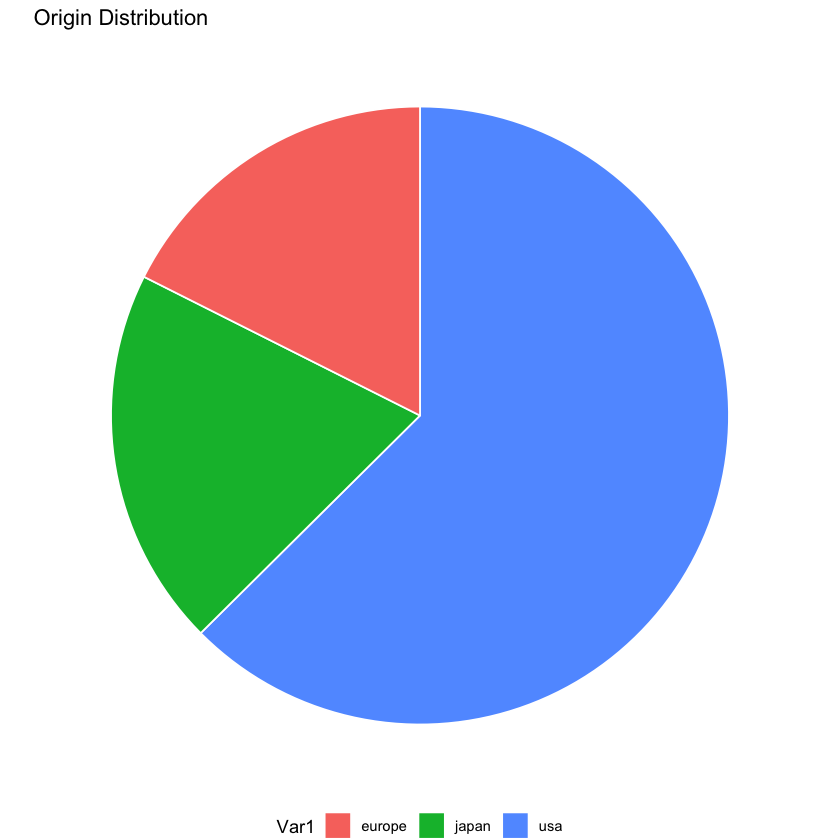

In [23]:
library(ggplot2)

country_counts <- table(cars$origin)
pie_chart <- ggplot(data = as.data.frame(country_counts), aes(x = "", y = Freq, fill = Var1)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar(theta = "y") +
  theme_void() +
  ggtitle("Origin Distribution") +
  theme(legend.position = "bottom")
print(pie_chart)

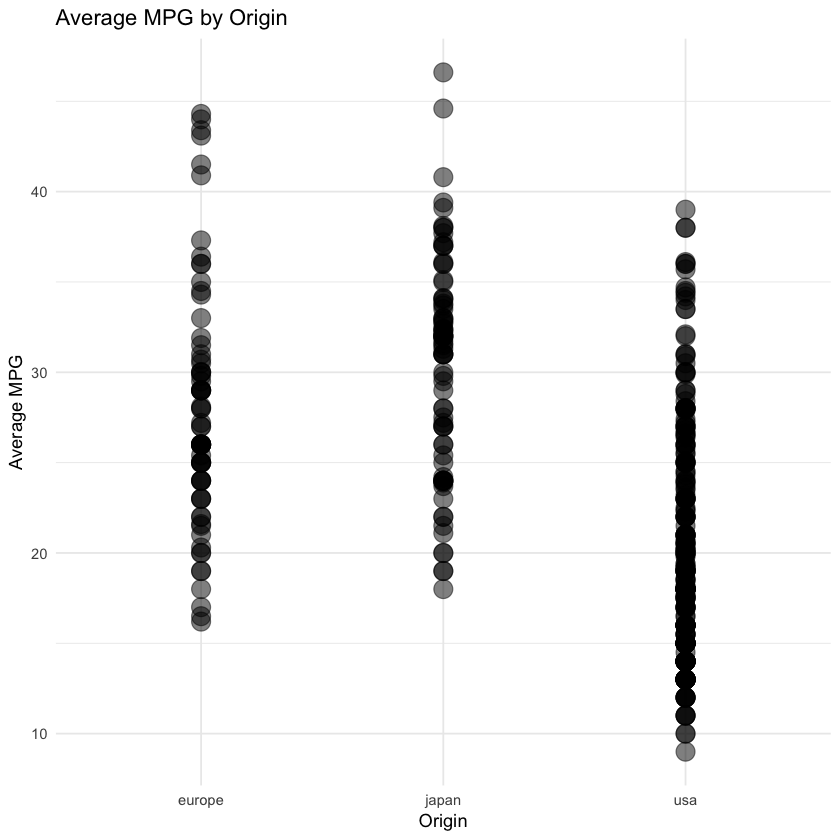

In [24]:
scatter_plot <- ggplot(cars, aes(x = origin, y = mpg)) +
  geom_point(size = 5, alpha = 0.5) +
  labs(title = "Average MPG by Origin", x = "Origin", y = "Average MPG") +
  theme_minimal()

print(scatter_plot)
# slot(table(cars$model_year, cars$), 
#         xlab="Year", 
#         ylab="number", main = "Model year plot")

# bar_plot <- ggplot(cars, aes(x = origin, y = mpg)) +
#   geom_bar(stat = "summary", fun = "mean", fill = "blue") +
#   labs(title = "Average MPG by Origin", x = "Origin", y = "Average MPG") +
#   theme_minimal()

# print(bar_plot)

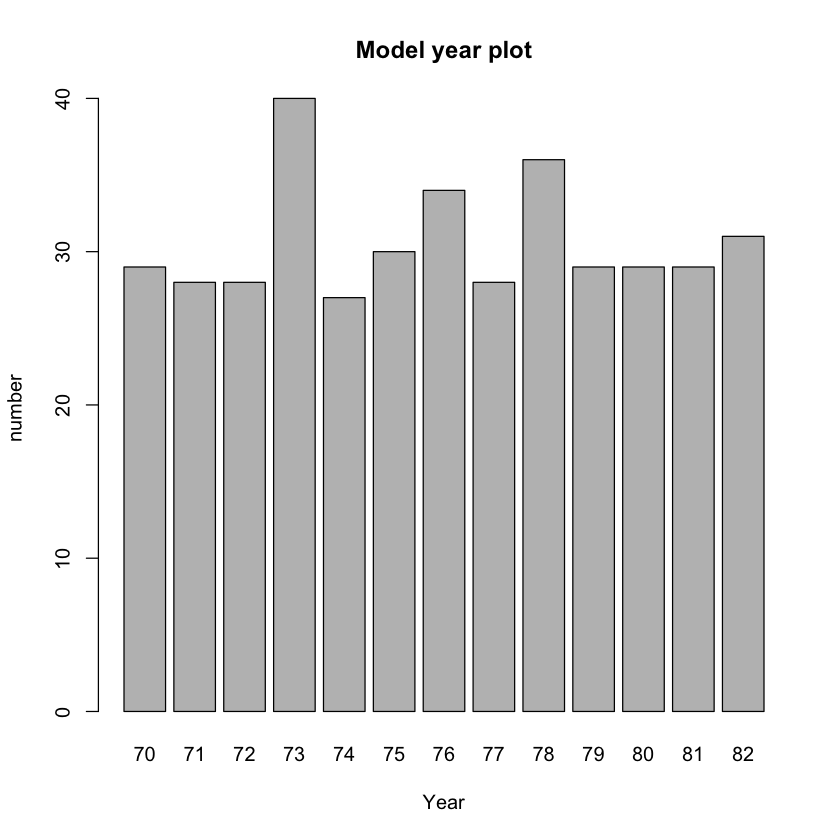

In [7]:
# count_by_year <- table(cars$model_year)
# line_plot <- ggplot(data = as.data.frame(count_by_year), aes(x = Var1, y = Freq)) +
#   geom_line(color = "blue", marker = "o") +
#   labs(title = "Number of Cars Produced by Year", x = "Year", y = "Number of Cars") +
#   theme_minimal()

barplot(table(cars$model_year), 
        xlab="Year", 
        ylab="number", main = "Model year plot")


# print(line_plot)

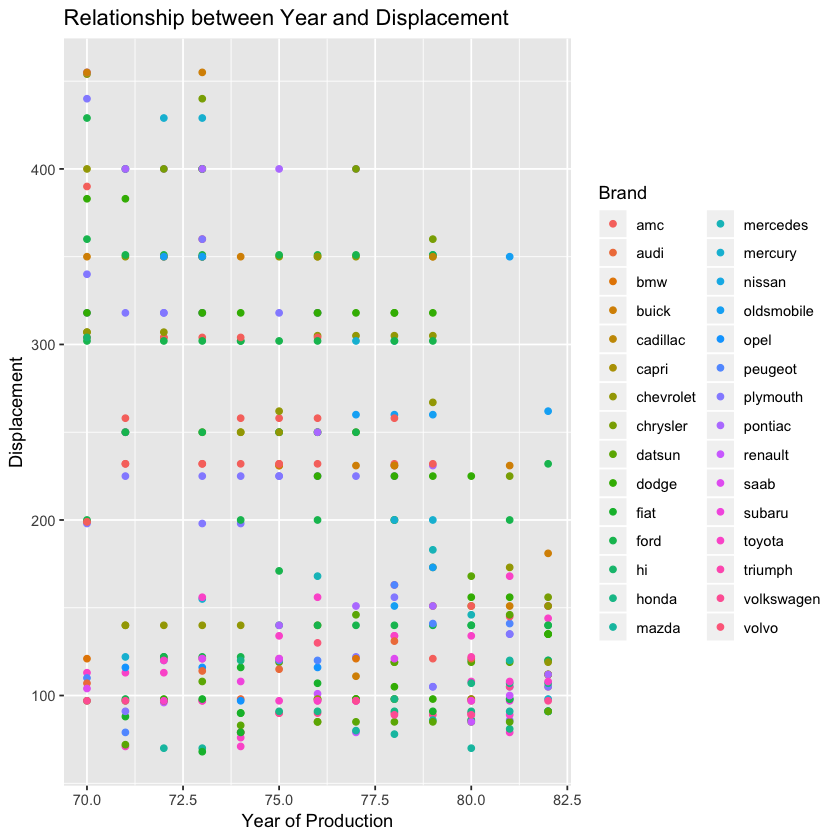

In [43]:
ggplot(cars, aes(x=model_year, y = displacement)) + 
    geom_point(aes(color=brand)) +
    labs( title = "Relationship between Year and Displacement",
        x = "Year of Production",
        y= "Displacement",
        color="Brand")

Warning message:
“Ignoring unknown parameters: fun”Warning message:
“Ignoring unknown parameters: fun”No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()


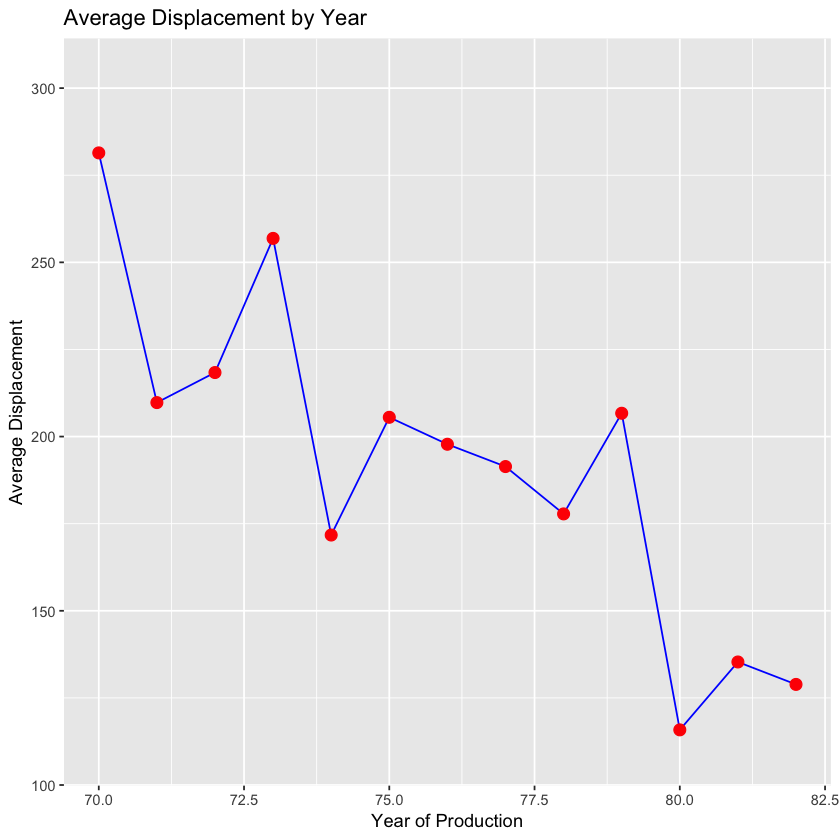

In [36]:
ggplot(cars,aes(x=model_year,y=displacement))+
    geom_line(stat="summary", fun="mean", aes(group =1),color="blue")+
    geom_point(stat = "summary", fun = "mean", color = "red", size =3)+
labs(title = "Average Displacement by Year",
    x="Year of Production",
    y="Average Displacement")

Back in time, the displacement was quite important parameter. Before hybridization and forced induction became so popular — displacement gave you a pretty good idea of how much power an engine made relative to another. The plot gives us un idea how this parameter were considered as important over the years. At first producers really tried to keep it high so that buyers will see their cars are good. Over the years they start focusing on different parameters of car performance. 